### Voronyi-Stepan-Camp-2025
### Task 1

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

df = pd.read_csv('data/website_ab_test.csv')
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


In [30]:
print("Number of missing values in 'Conversion Rate':", df['Conversion Rate'].isna().sum())
print("Unique values in 'Theme' column:", df['Theme'].unique())

counts = df['Theme'].value_counts()
print("\nNumber of observations by theme:")
print(counts)

group_stats = df.groupby('Theme')['Conversion Rate'].agg(['mean', 'std', 'count'])
group_stats = group_stats.rename(columns={'mean': 'Mean_CR', 'std': 'Std_CR', 'count': 'Count'})
print("\nDescriptive statistics of Conversion Rate by group:")
print(group_stats)

Number of missing values in 'Conversion Rate': 0
Unique values in 'Theme' column: ['Light Theme' 'Dark Theme']

Number of observations by theme:
Theme
Dark Theme     514
Light Theme    486
Name: count, dtype: int64

Descriptive statistics of Conversion Rate by group:
              Mean_CR    Std_CR  Count
Theme                                 
Dark Theme   0.251282  0.140945    514
Light Theme  0.255459  0.137217    486


In [31]:
light = df[df['Theme'] == 'Light Theme']['Conversion Rate'].dropna()
dark  = df[df['Theme'] == 'Dark Theme']['Conversion Rate'].dropna()

t_stat, p_value = ttest_ind(light, dark, equal_var=False)
print(f"\nt-statistics: {t_stat:.4f}")
print(f"p-value      : {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(f"  → p-value ({p_value:.4f}) < {alpha}: відкидаємо H₀ (різниця статистично значуща).")
else:
    print(f"  → p-value ({p_value:.4f}) ≥ {alpha}: недостатньо доказів, щоб відкинути H₀.")


t-statistics: 0.4748
p-value      : 0.6350
  → p-value (0.6350) ≥ 0.05: недостатньо доказів, щоб відкинути H₀.


### Task 2

In [32]:
df = pd.read_csv("data/insurance.csv") 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
print("\nDescriptive statistics for numerical variables:")
display(df[['age', 'bmi', 'children', 'charges']].describe())

print("\nValue counts for 'sex':")
display(df['sex'].value_counts())

print("\nValue counts for 'smoker':")
display(df['smoker'].value_counts())

print("\nValue counts for 'region':")
display(df['region'].value_counts())


Descriptive statistics for numerical variables:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



Value counts for 'sex':


sex
male      676
female    662
Name: count, dtype: int64


Value counts for 'smoker':


smoker
no     1064
yes     274
Name: count, dtype: int64


Value counts for 'region':


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [35]:
def find_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound), lower_bound, upper_bound

outliers_info = {}
for col in ['age', 'bmi', 'children', 'charges']:
    mask, lb, ub = find_outliers_iqr(df[col])
    outliers_count = mask.sum()
    outliers_info[col] = {'count': outliers_count, 'lower_bound': lb, 'upper_bound': ub}
    print(f"Column '{col}': {outliers_count} outliers | IQR bounds = [{lb:.2f}, {ub:.2f}]")

print("\nSample outliers for 'bmi':")
display(df[find_outliers_iqr(df['bmi'])[0]].head())

print("\nSample outliers for 'charges':")
display(df[find_outliers_iqr(df['charges'])[0]].head())

Column 'age': 0 outliers | IQR bounds = [-9.00, 87.00]
Column 'bmi': 9 outliers | IQR bounds = [13.70, 47.29]
Column 'children': 0 outliers | IQR bounds = [-3.00, 5.00]
Column 'charges': 139 outliers | IQR bounds = [-13109.15, 34489.35]

Sample outliers for 'bmi':


,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520



Sample outliers for 'charges':


,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760


In [38]:
print("Missing values before cleaning:")
print(df.isna().sum())

df_clean = df.copy()
bmi_mask, bmi_lb, bmi_ub = find_outliers_iqr(df_clean['bmi'])
charges_mask, ch_lb, ch_ub = find_outliers_iqr(df_clean['charges'])
combined_outlier_mask = bmi_mask | charges_mask
print(f"\nNumber of rows to remove (bmi or charges outliers): {combined_outlier_mask.sum()}")
df_clean = df_clean.loc[~combined_outlier_mask].reset_index(drop=True)

print(f"Shape before cleaning: {df.shape}")
print(f"Shape after removing outliers: {df_clean.shape}")

Missing values before cleaning:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Number of rows to remove (bmi or charges outliers): 145
Shape before cleaning: (1338, 7)
Shape after removing outliers: (1193, 7)


When exploring the dataset, I observed that the bmi and charges columns contained values far beyond what would be considered typical. Extremely high charges can occur when a small subset of patients undergoes very costly treatments or extended hospital stays, pushing their medical costs into the tens of thousands of dollars. Similarly, BMI values above 50 often correspond to severe obesity, which—while possible—is uncommon in a general population sample and may reflect data-entry errors or rare clinical conditions.

Such outliers can heavily skew summary statistics and model estimates. For example, a handful of very large charges disproportionately raises the overall mean, making it a poor estimate of typical patient costs. In predictive modeling, these extreme observations can dominate the loss function, causing regression coefficients to overemphasize relationships that don’t apply to most patients. Likewise, extreme BMI values can distort any analysis of the association between body mass and healthcare expenses.

To mitigate these issues, I chose to remove any observations with bmi or charges outside the interquartile range extended by 1.5×IQR—that is, values beyond the “IQR bounds.” By dropping only these extreme rows, I retain the vast majority of the sample while eliminating the most aberrant cases. This method does not alter the remaining values themselves, so it preserves the natural variability of typical data points. Ultimately, removing these outliers improves the robustness of subsequent analyses and ensures that summary metrics and predictive models better reflect the central tendency of the population.

### Task 3

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
import pingouin as pg
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("data/train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [48]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64


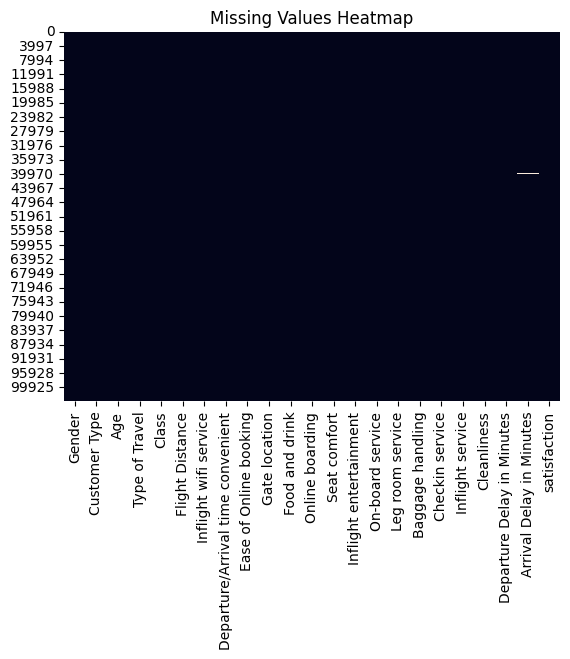

In [49]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()
df.drop(columns=['Arrival Delay in Minutes'], inplace=True)

In [50]:
survey_cols = df.columns[6:20]
survey_df = df[survey_cols]

print("\nDescriptive statistics for survey items:")
print(survey_df.describe())


Descriptive statistics for survey items:
       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           103904.000000  103904.000000   103904.000000    103904.000000   
mean                 2.756901       2.976883        3.202129         3.250375   
std                  1.398929       1.277621        1.329533         1.349509   
min                  0.000000 


Eigenvalues:
[3.80011677 2.36198598 2.16589224 1.06327401 0.95093123 0.7003355
 0.53995637 0.51465504 0.46947475 0.36866001 0.32840792 0.29509562
 0.25317089 0.18804368]


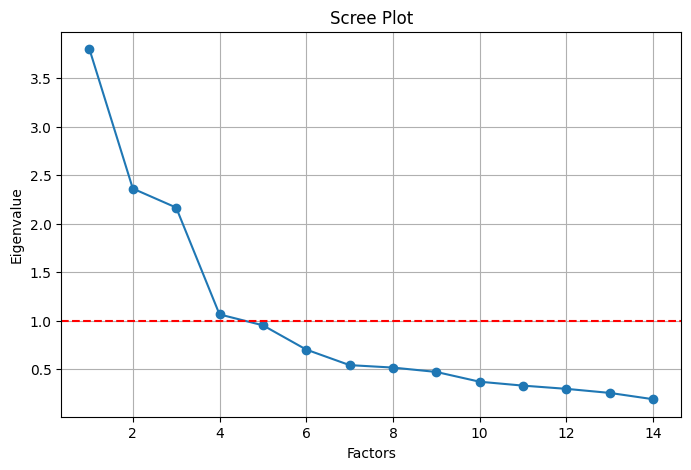

In [51]:
fa = FactorAnalyzer()
fa.fit(survey_df)

ev, v = fa.get_eigenvalues()
print("\nEigenvalues:")
print(ev)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(ev) + 1), ev, marker='o')
plt.axhline(y=1, color='r', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [52]:
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(survey_df)

loadings = pd.DataFrame(fa.loadings_, index=survey_cols)
print("\nFactor Loadings:")
print(loadings.round(2))


Factor Loadings:
                                      0     1     2
Inflight wifi service              0.17  0.13  0.76
Departure/Arrival time convenient -0.03  0.06  0.50
Ease of Online booking             0.03  0.02  0.93
Gate location                     -0.03 -0.03  0.50
Food and drink                     0.75  0.01  0.01
Online boarding                    0.40  0.11  0.36
Seat comfort                       0.79  0.08  0.03
Inflight entertainment             0.75  0.47  0.01
On-board service                   0.09  0.70  0.03
Leg room service                   0.07  0.48  0.08
Baggage handling                   0.02  0.76  0.03
Checkin service                    0.14  0.28  0.03
Inflight service                   0.02  0.80  0.02
Cleanliness                        0.86  0.09 -0.00


In [53]:
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]

alpha1 = pg.cronbach_alpha(factor1)
alpha2 = pg.cronbach_alpha(factor2)
alpha3 = pg.cronbach_alpha(factor3)

print("\nCronbach's Alpha for Factor 1:", round(alpha1[0], 2))
print("Cronbach's Alpha for Factor 2:", round(alpha2[0], 2))
print("Cronbach's Alpha for Factor 3:", round(alpha3[0], 2))


Cronbach's Alpha for Factor 1: 0.88
Cronbach's Alpha for Factor 2: 0.79
Cronbach's Alpha for Factor 3: 0.77


The factor analysis identified three key dimensions: onboard comfort (Factor 1), service quality (Factor 2), and pre-flight convenience (Factor 3). These were formed based on related survey items. The Cronbach’s Alpha values — 0.88, 0.79, and 0.77 — confirm their reliability. These factors can be used in future research or predictive models to better understand and improve passenger satisfaction.